# 0 Preamble

## <span style="color: red;">0.0 Initialize Environment</span>
<span style="color: red;">Start Warning</span>

Run the following only if you need to **initialize** source data for the entire project environment.

In [ ]:
%run grabSource.py

Run the following only if you need to **overwrite** source data for the entire project environment.

In [ ]:
%run grabSource.py overwrite

<span style="color: red;">End Warning</span>

## 0.1 Global Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0.2 Local Packages

In [2]:
from ingestRaw import *
from segmentData import event_timeline

## 0.3 Import Data

In [3]:
memberIdeas_raw = ingestMemberVote()

# 1 Data Mining

## 1.1 Verify Data Types

In [4]:
memberIdeas_raw.dtypes

congress                           Int64
chamber                           object
icpsr                              Int64
state_icpsr                        Int64
district_code                      Int64
state_abbrev                      object
party_code                         Int64
occupancy                          Int64
last_means                         Int64
bioname                           object
bioguide_id                       object
born                               Int64
died                               Int64
nominate_dim1                    float64
nominate_dim2                    float64
nominate_log_likelihood          float64
nominate_geo_mean_probability    float64
nominate_number_of_votes           Int64
nominate_number_of_errors          Int64
conditional                       object
nokken_poole_dim1                float64
nokken_poole_dim2                float64
dtype: object

## 1.2 Initial Distributions

In [5]:
memberIdeas_raw.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
congress,50494.0,<NA>,<NA>,<NA>,69.777875,30.682306,1.0,47.0,73.0,95.0,118.0
chamber,50494,3,House,40474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icpsr,50494.0,<NA>,<NA>,<NA>,9793.048521,10204.608081,1.0,3673.25,7440.5,12038.75,99999.0
state_icpsr,50494.0,<NA>,<NA>,<NA>,33.722403,20.552187,1.0,14.0,33.0,49.0,99.0
district_code,50494.0,<NA>,<NA>,<NA>,9.291896,16.309999,0.0,1.0,5.0,10.0,99.0
state_abbrev,50494,57,NY,4356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party_code,50494.0,<NA>,<NA>,<NA>,226.151087,656.389996,1.0,100.0,100.0,200.0,8888.0
occupancy,48213.0,<NA>,<NA>,<NA>,0.131583,0.52683,0.0,0.0,0.0,0.0,7.0
last_means,48213.0,<NA>,<NA>,<NA>,1.225022,0.671845,0.0,1.0,1.0,1.0,7.0
bioname,50494,12363,"DINGELL, John David, Jr.",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.3 Preliminary Filtering

The US is primarily controlled by the two-party system of Republicans and Democrats. The source data accounts for all variations and recognized sub-parties affecting the Congressional bodies. For the simplicity of this report, along with the de minimus values available for all non-dominant parties, we reduce the source data to only members of the Republican or Democratic parties within the House or Senate bodies. Additionally we exclude any information of the first 32 Congressional Sessions due to weak, missing, or unviable data; note that some data is weak until the 40th Congress and will reduce analysis ad-hoc to accomodate those early Sessions as outlier entities.

In [6]:
partyInclude = [100, 200]
memberIdeas_clean = memberIdeas_raw.query(
    f"party_code in {partyInclude}"
)
memberIdeas_clean = memberIdeas_clean.query(
    f"chamber != 'President'"
)
memberIdeas_clean = memberIdeas_clean.query(
    f"congress > 33"
)
memberIdeas_clean = memberIdeas_clean.drop(
    columns= [
        'state_icpsr',
        'district_code'
    ]
)
memberIdeas_clean['party'] = memberIdeas_clean['party_code'].apply(lambda x: 'Republican' if x == 200 else 'Democrat')

## 1.4 Final Distributions

In [7]:
memberIdeas_clean.describe(include= 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
congress,41675.0,<NA>,<NA>,<NA>,79.73159,22.98499,34.0,61.0,80.0,99.0,118.0
chamber,41675,2,House,33621,NaN,NaN,NaN,NaN,NaN,NaN,NaN
icpsr,41675.0,<NA>,<NA>,<NA>,10422.627522,9612.21588,1.0,3989.0,8024.0,14421.0,99542.0
state_abbrev,41675,56,NY,3325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
party_code,41675.0,<NA>,<NA>,<NA>,147.577684,49.941889,100.0,100.0,100.0,200.0,200.0
occupancy,39456.0,<NA>,<NA>,<NA>,0.109008,0.482626,0.0,0.0,0.0,0.0,7.0
last_means,39456.0,<NA>,<NA>,<NA>,1.170519,0.601623,0.0,1.0,1.0,1.0,7.0
bioname,41675,9183,"DINGELL, John David, Jr.",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bioguide_id,41673,9210,D000355,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
born,41666.0,<NA>,<NA>,<NA>,1893.629746,44.677795,1782.0,1858.0,1894.0,1933.0,1997.0


## 1.5 Transformations

The data provided is at an individual Members' level of detail; this report is consolidating the values into Congressional Session, House, and Party levels to run consensus analysis.

In [8]:
cpIdeas = memberIdeas_clean.groupby(['congress', 'party']).agg(party_mean= ('nominate_dim1', 'mean')).reset_index(drop= False)
ccIdeas = memberIdeas_clean.groupby(['congress', 'chamber']).agg(chamber_mean= ('nominate_dim1', 'mean')).reset_index(drop= False)
cIdeas = memberIdeas_clean.groupby(['congress']).agg(Congress= ('nominate_dim1', 'mean')).reset_index(drop= False)
ccIdeas = ccIdeas.pivot(columns= 'chamber', index= 'congress', values= 'chamber_mean')
cpIdeas = cpIdeas.pivot(columns= 'party', index= 'congress', values= 'party_mean')
compositeIdeas = pd.merge(
    cIdeas, ccIdeas,
    how= 'outer',
    on= 'congress'
)
compositeIdeas = pd.merge(
    compositeIdeas, cpIdeas,
    how= 'outer',
    on= 'congress'
)

compositeIdeas['Republican Congress Delta'] = compositeIdeas['Republican'] - compositeIdeas['Congress']
compositeIdeas['Democrat Congress Delta'] = compositeIdeas['Democrat'] - compositeIdeas['Congress']
compositeIdeas['Party Delta'] = compositeIdeas['Republican'] - compositeIdeas['Democrat']
compositeIdeas['Year'] = compositeIdeas['congress']*2 + 1787
compositeIdeas

,congress,Congress,House,Senate,Democrat,Republican,Republican Congress Delta,Democrat Congress Delta,Party Delta,Year
0,34,-0.378183,-0.385570,-0.362300,-0.391476,0.446000,0.824183,-0.013293,0.837476,1855
1,35,-0.113215,-0.086022,-0.204794,-0.384049,0.315409,0.428624,-0.270834,0.699458,1857
2,36,-0.049733,-0.011200,-0.165897,-0.428016,0.284200,0.333933,-0.378283,0.712216,1859
3,37,0.082035,0.139873,-0.064785,-0.290925,0.280947,0.198912,-0.372960,0.571872,1861
4,38,0.067766,0.053925,0.116978,-0.288812,0.320342,0.252576,-0.356578,0.609153,1863
...,...,...,...,...,...,...,...,...,...,...
80,114,0.105069,0.103372,0.112704,-0.383235,0.479702,0.374633,-0.488304,0.862937,2015
81,115,0.099821,0.098927,0.103728,-0.378657,0.488879,0.389058,-0.478478,0.867536,2017
82,116,0.047788,0.033542,0.111610,-0.366427,0.499947,0.452158,-0.414215,0.866373,2019
83,117,0.061038,0.053013,0.097550,-0.373555,0.506734,0.445696,-0.434593,0.880289,2021


# 2 Timeseries Analysis

## 2.1 Nominate Mean Overlays

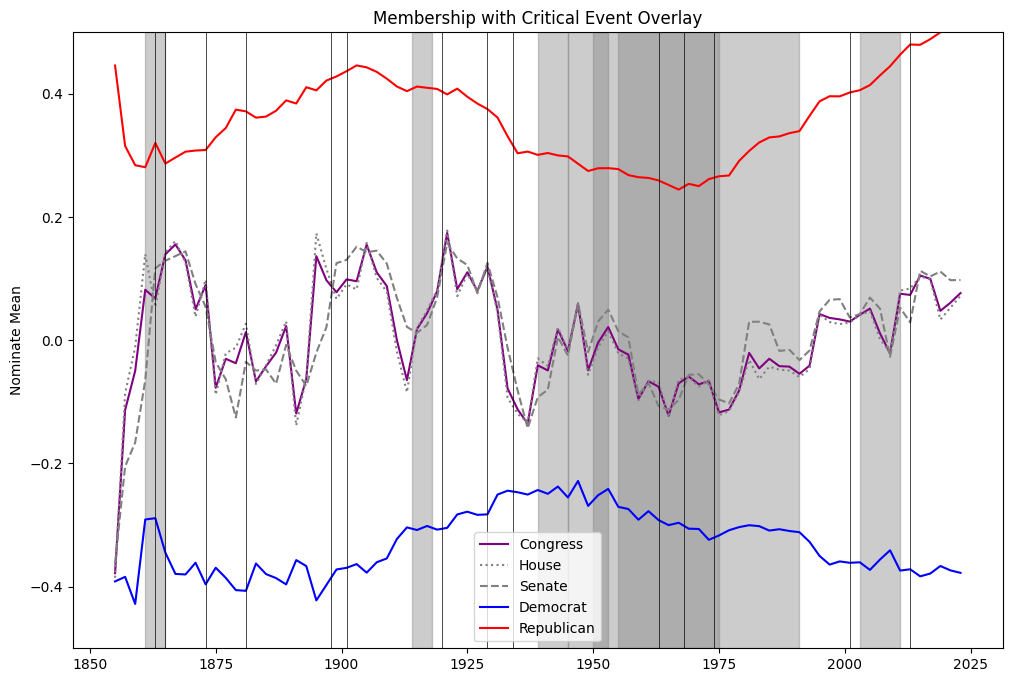

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(compositeIdeas['Year'], compositeIdeas['Congress'], label='Congress', color='purple')
ax.plot(compositeIdeas['Year'], compositeIdeas['House'], label='House', color='gray', ls= 'dotted')
ax.plot(compositeIdeas['Year'], compositeIdeas['Senate'], label='Senate', color='gray', ls= 'dashed')
ax.plot(compositeIdeas['Year'], compositeIdeas['Democrat'], label='Democrat', color='blue')
ax.plot(compositeIdeas['Year'], compositeIdeas['Republican'], label='Republican', color='red')
ax.set_ylim([-.5, .5])
for row in event_timeline.itertuples():
    if pd.notna(row.stop):
        ax.axvspan(row.start, row.stop, color= 'gray', alpha=0.4)
    else:
        ax.axvline(x= row.start, color= 'black', linestyle= 'solid', linewidth= .5)


# Shade the area between 1860 and 1865 with 50% transparency
# ax.axvspan(1860, 1865, color='gray', alpha=0.5)
ax.legend()
plt.title("Membership with Critical Event Overlay")
plt.ylabel("Nominate Mean")
plt.show()

Above is the nominate mean scores over time with a subset overlay of major US and US-Global political, sociological, economica, and terrorstic events. Solid black bars represent a single instance whereas shaded areas denote campaigns lasting more than a year, such as wars. This dense graph provides us with several significant points to consider:
<ol>
    <li>Nominate scores of the Senate and House do not deviate significantly from the composite Congressional body. This suggests we can analyze Congress as a whole in the same way we would facet information between the House and Senate.</li>
    <li>Major events do not appear to impace the peaks or valleys in a way that would suggest one party is more adept at handling issues affecting the country holistically better than the other.</li>
    <li>The end of the New Deal Coalition in 1969 marks a time of significant unrest in the country, gernered by the density and frequency of major events in the decade. This era is a clear turning point in American politics and the beginning of the modern polarity in political opinion. This finding is in alignment with several professional publications on the 'Sixth Party System'.</li>
    <li>The overall Congressional Session appears to drift more Conservative as the Nominate mean difference increases, both in recent history and at the turn of the 20th century when the divide was similarly large.</li>
</ol>

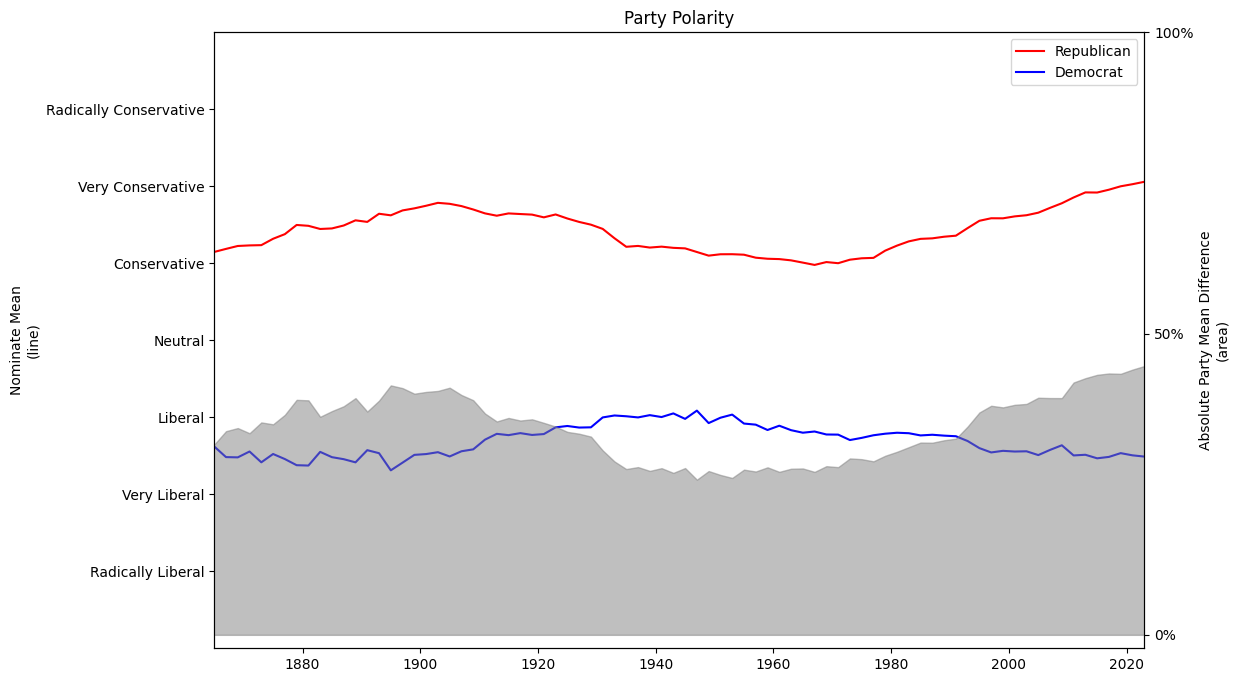

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(compositeIdeas['Year'], compositeIdeas['Republican'], label='Republican', color='red')
ax.plot(compositeIdeas['Year'], compositeIdeas['Democrat'], label='Democrat', color='blue')
bx = ax.twinx()
bx.fill_between(compositeIdeas['Year'], compositeIdeas['Party Delta'], color= 'gray', alpha= .5)
ax.legend()
ax.set_ylim([-1, 1])
ax.set_ylabel('Nominate Mean\n(line)')
ax.set_yticks(
    [-.75, -.5, -.25, 0, .25, .5, .75],
    ['Radically Liberal', 'Very Liberal', 'Liberal', 'Neutral', 'Conservative', 'Very Conservative', 'Radically Conservative'],
)
#bx.set_yscale('log')
bx.set_ylabel('Absolute Party Mean Difference\n(area)')
bx.set_yticks(
    [0, 1, 2],
    ['0%', '50%', '100%'],
)
plt.xlim([1865, 2023])
plt.title("Party Polarity")
plt.show()

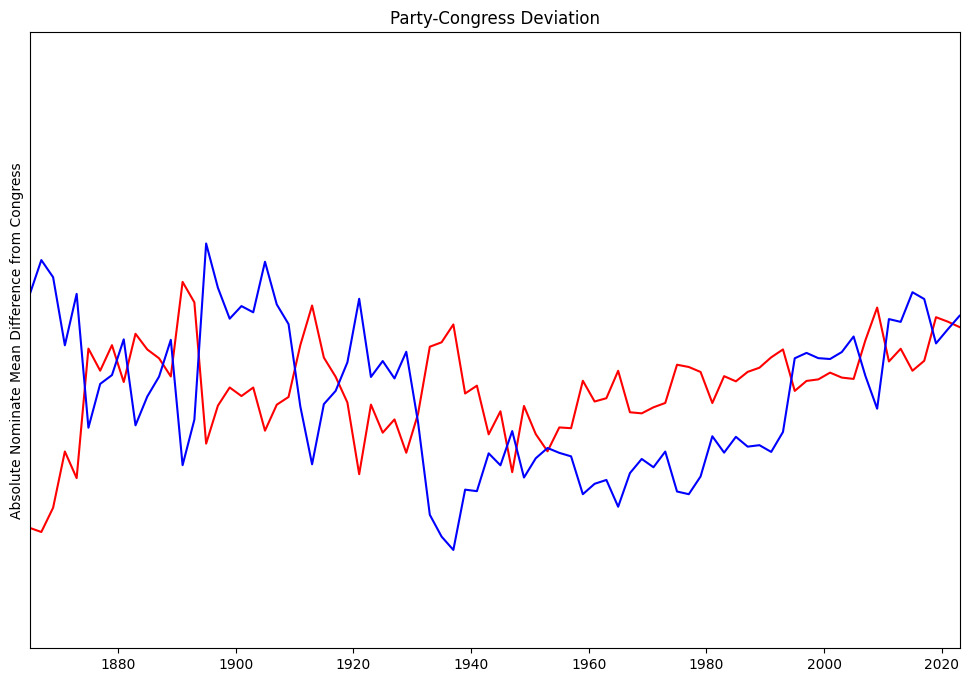

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(compositeIdeas['Year'], compositeIdeas['Republican Congress Delta'], label='Republican', color='red')
ax.plot(compositeIdeas['Year'], -compositeIdeas['Democrat Congress Delta'], label='Democrat', color='blue')
ax.set_ylabel('Absolute Nominate Mean Difference from Congress')
ax.set_yticks([])
plt.xlim([1865, 2023])
plt.title("Party-Congress Deviation")
plt.show()

The Party Polarity Timeline tracks the individual Parties along with their absolute mean difference. This plotting suggests that while the deviation has increased, it is not as much about the radicalization of both parties as it is the radicalization of the Republican Party against a less-volitile change in the Democratic Party.

This notion is further supported when comparing the deviation of the Parties against the Nominate means of the whole Congressional Session. The radicalization of the Right is increasing on both spectrums, causing a nominal spread and rebellion against other constituent bodies.

The final plot shows the same deviation from the Congress mean scores. The curiosity is how each Party shows similar deviation from Congress, which infers that Congress as a whole is following suit with its Republican membership and is moving toward a further-Conservative disposition.